# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [12]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

piece_count  list_price  num_reviews  play_star_rating  star_rating  \
0    -0.273020       29.99    -0.398512         -0.655279    -0.045687   
1    -0.404154       19.99    -0.398512         -0.655279     0.990651   
2    -0.517242       12.99    -0.147162         -0.132473    -0.460222   
3     0.635296       99.99     0.187972         -1.352353     0.161581   
4     0.288812       79.99    -0.063378         -2.049427     0.161581   

   val_star_rating  ages_10+  ages_10-14  ages_10-16  ages_10-21  ...  \
0        -0.365010         0           0           0           0  ...   
1        -0.365010         0           0           0           0  ...   
2        -0.204063         0           0           0           0  ...   
3         0.117830         0           0           0           0  ...   
4        -0.204063         0           0           0           0  ...   

   country_NZ  country_PL  country_PT  country_US  review_difficulty_Average  \
0           0           0           0           1                          1   
1           0           0           0           1                          0   
2           0           0           0           1                          0   
3           0           0           0           1                          1   
4           0           0           0           1                          0   

   review_difficulty_Challenging  review_difficulty_Easy  \
0                              0                       0   
1                              0                       1   
2                              0                       1   
3                              0                       0   
4                              1                       0   

   review_difficulty_Very Challenging  review_difficulty_Very Easy  \
0                                   0                            0   
1                                   0                            0   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   

   review_difficulty_unknown  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 103 columns]

In [13]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [14]:
df.columns = [col_formatting(col) for col in df.columns]

In [15]:
list(df.columns)

[&#39;piece_count&#39;,
 &#39;list_price&#39;,
 &#39;num_reviews&#39;,
 &#39;play_star_rating&#39;,
 &#39;star_rating&#39;,
 &#39;val_star_rating&#39;,
 &#39;ages_10plus&#39;,
 &#39;ages_10_14&#39;,
 &#39;ages_10_16&#39;,
 &#39;ages_10_21&#39;,
 &#39;ages_11_16&#39;,
 &#39;ages_12plus&#39;,
 &#39;ages_12_16&#39;,
 &#39;ages_14plus&#39;,
 &#39;ages_16plus&#39;,
 &#39;ages_1half_3&#39;,
 &#39;ages_1half_5&#39;,
 &#39;ages_2_5&#39;,
 &#39;ages_4plus&#39;,
 &#39;ages_4_7&#39;,
 &#39;ages_4_99&#39;,
 &#39;ages_5plus&#39;,
 &#39;ages_5_12&#39;,
 &#39;ages_5_8&#39;,
 &#39;ages_6plus&#39;,
 &#39;ages_6_12&#39;,
 &#39;ages_6_14&#39;,
 &#39;ages_7plus&#39;,
 &#39;ages_7_12&#39;,
 &#39;ages_7_14&#39;,
 &#39;ages_8plus&#39;,
 &#39;ages_8_12&#39;,
 &#39;ages_8_14&#39;,
 &#39;ages_9plus&#39;,
 &#39;ages_9_12&#39;,
 &#39;ages_9_14&#39;,
 &#39;ages_9_16&#39;,
 &#39;theme_name_Angry_Birds&#39;,
 &#39;theme_name_Architecture&#39;,
 &#39;theme_name_BOOST&#39;,
 &#39;theme_name_Blues_Helicopter_Pursuit&#3

In [16]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [17]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [18]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [21]:
print(len(train), len(test))
train.head()

8152 2718


piece_count  list_price  num_reviews  play_star_rating  star_rating  \
1051     -0.605066     30.3924    -0.398512          1.087407     0.990651   
847       2.115067    174.7924     4.488858          0.041796     0.161581   
7734     -0.155119     48.7878     0.187972          0.041796     0.161581   
10469    -0.350016     24.3878    -0.398512          1.087407     0.990651   
5150     -0.572583     24.3878    -0.286801          0.216064     0.161581   

       val_star_rating  ages_10plus  ages_10_14  ages_10_16  ages_10_21  ...  \
1051          1.244458            0           0           0           1  ...   
847           0.278777            0           0           0           0  ...   
7734         -0.525957            0           0           0           0  ...   
10469         1.244458            0           0           0           0  ...   
5150          0.117830            0           0           0           0  ...   

       country_NZ  country_PL  country_PT  country_US  \
1051            0           0           0           0   
847             0           0           0           0   
7734            0           0           0           0   
10469           0           0           1           0   
5150            0           0           0           0   

       review_difficulty_Average  review_difficulty_Challenging  \
1051                           0                              0   
847                            0                              1   
7734                           1                              0   
10469                          0                              0   
5150                           0                              0   

       review_difficulty_Easy  review_difficulty_Very_Challenging  \
1051                        0                                   0   
847                         0                                   0   
7734                        0                                   0   
10469                       0                                   0   
5150                        0                                   0   

       review_difficulty_Very_Easy  review_difficulty_unknown  
1051                             0                          1  
847                              0                          0  
7734                             0                          0  
10469                            1                          0  
5150                             0                          1  

[5 rows x 103 columns]

In [22]:
test.head()

piece_count  list_price  num_reviews  play_star_rating  star_rating  \
6620     -0.543710     57.3860    -0.147162          0.913138     0.368848   
10796    -0.056468     79.2878    -0.119234          0.041796    -0.460222   
1888     -0.479947     30.4878    -0.398512         -1.526621    -1.082024   
2172     -0.267004     42.6878     0.606889          0.216064     0.368848   
7992     -0.467916     24.3878    -0.286801          0.216064     0.161581   

       val_star_rating  ages_10plus  ages_10_14  ages_10_16  ages_10_21  ...  \
6620          0.278777            0           0           0           0  ...   
10796        -1.008797            0           0           0           0  ...   
1888         -1.169744            0           0           0           0  ...   
2172          0.761617            0           0           0           0  ...   
7992          0.117830            0           0           0           0  ...   

       country_NZ  country_PL  country_PT  country_US  \
6620            0           0           0           0   
10796           0           0           1           0   
1888            0           0           0           0   
2172            0           0           0           0   
7992            0           0           0           0   

       review_difficulty_Average  review_difficulty_Challenging  \
6620                           0                              0   
10796                          0                              0   
1888                           0                              0   
2172                           0                              0   
7992                           0                              0   

       review_difficulty_Easy  review_difficulty_Very_Challenging  \
6620                        1                                   0   
10796                       1                                   0   
1888                        1                                   0   
2172                        1                                   0   
7992                        0                                   0   

       review_difficulty_Very_Easy  review_difficulty_unknown  
6620                             0                          0  
10796                            0                          0  
1888                             0                          0  
2172                             0                          0  
7992                             0                          1  

[5 rows x 103 columns]

In [23]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     552.6
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:13:27   Log-Likelihood:                -40347.
No. Observations:                8152   AIC:                         8.088e+04
Df Residuals:                    8057   BIC:                         8.155e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.3561      1.743     36.354      0.000      59.940      66.772
piece_count                                         75.8116      0.901     84.138      0.000      74.045      77.578
num_reviews                                          6.6238      0.673      9.848      0.000       5.305       7.942
play_star_rating                                     4.9291      0.619      7.967      0.000       3.716       6.142
star_rating                                         -1.7888      0.701     -2.551      0.011      -3.163      -0.414
val_star_rating                                     -7.9335      0.613    -12.938      0.000      -9.136      -6.732
ages_10plus                                        124.6563      6.463     19.288      0.000     111.988     137.325
ages_10_14                                         -21.8761      8.723     -2.508      0.012     -38.975      -4.777
ages_10_16                                         -12.7251      3.951     -3.220      0.001     -20.471      -4.979
ages_10_21                                          50.8348      7.204      7.056      0.000      36.712      64.957
ages_11_16                                         -15.8607      5.843     -2.714      0.007     -27.315      -4.406
ages_12plus                                         68.0507      5.367     12.679      0.000      57.529      78.572
ages_12_16                                         -58.1958      6.686     -8.704      0.000     -71.302     -45.090
ages_14plus                                         25.9666      4.030      6.444      0.000      18.067      33.866
ages_16plus                                         28.4621      5.963      4.773      0.000      16.773      40.152
ages_1half_3                                        -8.6905      2.412     -3.603      0.000     -13.419      -3.962
ages_1half_5                                        -3.7683      2.941     -1.281      0.200      -9.533       1.996
ages_2_5                                            13.9655      1.650      8.462      0.000      10.730      17.200
ages_4plus                                         -19.2167      6.349     -3.027      0.002     -31.662      -6.772
ages_4_7                                            -6.0736      2.934     -2.070      0.039     -11.826      -0.321
ages_4_99                                           -3.3333      3.591     -0.928      0.353     -10.372       3.706
ages_5plus                                          -9.8044      3.147     -3.116      0.002     -15.973      -3.636
ages_5_12                                          -34.8328      3.045    -11.441      0.000     -40.801     -28.865
ages_5_8 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [43]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 74
[&#39;piece_count&#39;, &#39;num_reviews&#39;, &#39;play_star_rating&#39;, &#39;star_rating&#39;, &#39;val_star_rating&#39;]


0                       coef    std err          t  P&gt;|t|     [0.025  \
                                                                       
Intercept            63.3561      1.743     36.354  0.000     59.940   
piece_count          75.8116      0.901     84.138  0.000     74.045   
num_reviews           6.6238      0.673      9.848  0.000      5.305   
play_star_rating      4.9291      0.619      7.967  0.000      3.716   
star_rating          -1.7888      0.701     -2.551  0.011     -3.163   

0                    0.975]  
                             
Intercept            66.772  
piece_count          77.578  
num_reviews           7.942  
play_star_rating      6.142  
star_rating          -0.414

In [44]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     710.8
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:40:13   Log-Likelihood:                -40360.
No. Observations:                8152   AIC:                         8.087e+04
Df Residuals:                    8078   BIC:                         8.139e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.0208      2.629     24.353      0.000      58.868      69.174
piece_count                                         76.0457      0.880     86.381      0.000      74.320      77.771
num_reviews                                          6.4485      0.651      9.911      0.000       5.173       7.724
play_star_rating                                     4.9424      0.600      8.231      0.000       3.765       6.119
star_rating                                         -1.7621      0.688     -2.563      0.010      -3.110      -0.414
val_star_rating                                     -7.8197      0.585    -13.358      0.000      -8.967      -6.672
ages_10plus                                        118.5110      5.026     23.578      0.000     108.658     128.364
ages_10_14                                         -18.2819      9.184     -1.991      0.047     -36.284      -0.280
ages_10_16                                         -10.1819      4.156     -2.450      0.014     -18.329      -2.034
ages_10_21                                          41.4569      3.622     11.446      0.000      34.357      48.557
ages_11_16                                         -14.4222      5.949     -2.424      0.015     -26.083      -2.761
ages_12plus                                         68.0073      6.058     11.227      0.000      56.133      79.882
ages_12_16                                         -53.8952      7.178     -7.508      0.000     -67.966     -39.824
ages_14plus                                         30.6286      4.637      6.605      0.000      21.538      39.719
ages_16plus                                         30.8439      6.815      4.526      0.000      17.485      44.203
ages_1half_3                                        -3.9787      3.602     -1.104      0.269     -11.040       3.083
ages_2_5                                            18.5416      2.574      7.202      0.000      13.495      23.588
ages_4plus                                         -14.7942      9.738     -1.519      0.129     -33.883       4.294
ages_4_7                                            -2.7852      2.703     -1.030      0.303      -8.084       2.514
ages_5plus                                          -8.1278      3.279     -2.479      0.013     -14.555      -1.700
ages_5_12                                          -30.8790      3.081    -10.023      0.000     -36.918     -24.840
ages_6plus                                         -24.5981      5.644     -4.358      0.000     -35.661     -13.535
ages_6_12                                          -17.5346      2.446     -7.170      0.000     -22.329     -12.740
ages_7_12

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [45]:
# Your code here - Continue to refine the model
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

75 66
[&#39;piece_count&#39;, &#39;num_reviews&#39;, &#39;play_star_rating&#39;, &#39;star_rating&#39;, &#39;val_star_rating&#39;]


0                       coef    std err          t  P&gt;|t|     [0.025  \
                                                                       
Intercept            64.0208      2.629     24.353   0.00     58.868   
piece_count          76.0457      0.880     86.381   0.00     74.320   
num_reviews           6.4485      0.651      9.911   0.00      5.173   
play_star_rating      4.9424      0.600      8.231   0.00      3.765   
star_rating          -1.7621      0.688     -2.563   0.01     -3.110   

0                    0.975]  
                             
Intercept            69.174  
piece_count          77.771  
num_reviews           7.724  
play_star_rating      6.119  
star_rating          -0.414

In [46]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     797.5
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:09:33   Log-Likelihood:                -40367.
No. Observations:                8152   AIC:                         8.087e+04
Df Residuals:                    8086   BIC:                         8.133e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.5707      1.320     47.385      0.000      59.982      65.159
piece_count                                         75.8691      0.846     89.643      0.000      74.210      77.528
num_reviews                                          6.1423      0.616      9.975      0.000       4.935       7.349
play_star_rating                                     5.1064      0.596      8.561      0.000       3.937       6.276
star_rating                                         -1.8097      0.682     -2.652      0.008      -3.147      -0.472
val_star_rating                                     -7.8556      0.580    -13.556      0.000      -8.992      -6.720
ages_10plus                                        121.3776      4.666     26.013      0.000     112.231     130.524
ages_10_14                                         -14.2214      8.910     -1.596      0.111     -31.687       3.245
ages_10_16                                          -6.6853      3.586     -1.864      0.062     -13.715       0.344
ages_10_21                                          43.9301      3.122     14.070      0.000      37.810      50.050
ages_11_16                                         -10.7435      5.520     -1.946      0.052     -21.565       0.078
ages_12plus                                         71.7675      5.672     12.653      0.000      60.649      82.886
ages_12_16                                         -49.8229      6.783     -7.345      0.000     -63.119     -36.527
ages_14plus                                         35.2985      4.014      8.795      0.000      27.431      43.166
ages_16plus                                         36.2825      6.196      5.856      0.000      24.138      48.427
ages_2_5                                            21.1530      1.793     11.800      0.000      17.639      24.667
ages_5plus                                          -7.1753      3.092     -2.321      0.020     -13.237      -1.114
ages_5_12                                          -27.7722      2.502    -11.099      0.000     -32.677     -22.867
ages_6plus                                         -21.5785      5.332     -4.047      0.000     -32.031     -11.126
ages_6_12                                          -14.1641      1.560     -9.077      0.000     -17.223     -11.105
ages_7_12                                          -13.2026      1.916     -6.891      0.000     -16.958      -9.447
ages_7_14                                           -9.0376      1.650     -5.476      0.000     -12.273      -5.803
ages_8plus                                          13.8177      4.235      3.263      0.001       5.517      22.119
ages_8_12

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [47]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[(&#39;piece_count&#39;, 4.438623983164616),
 (&#39;num_reviews&#39;, 2.4986480558974447),
 (&#39;play_star_rating&#39;, 2.408628106498115),
 (&#39;star_rating&#39;, 3.171245035993979),
 (&#39;val_star_rating&#39;, 2.3766962285734503),
 (&#39;ages_10plus&#39;, 7.067719814753873),
 (&#39;ages_10_14&#39;, 1.0743443527274403),
 (&#39;ages_10_16&#39;, 1.1296762582351147),
 (&#39;ages_10_21&#39;, 1.0657332571230314),
 (&#39;ages_11_16&#39;, 1.1397699859177386),
 (&#39;ages_12plus&#39;, 6.025943333096762),
 (&#39;ages_12_16&#39;, 1.1522627824884657),
 (&#39;ages_14plus&#39;, 1.7566702620453931),
 (&#39;ages_16plus&#39;, 8.839495435927963),
 (&#39;ages_2_5&#39;, 1.2450386978512502),
 (&#39;ages_5plus&#39;, inf),
 (&#39;ages_5_12&#39;, 3.20431063372661),
 (&#39;ages_6plus&#39;, 2.668455868293384),
 (&#39;ages_6_12&#39;, 1.7821831357673827),
 (&#39;ages_7_12&#39;, 1.453021024269132),
 (&#39;ages_7_14&#39;, 1.7025923141776311),
 (&#39;ages_8plus&#39;, 2.5818961181092943),
 (&#39;ages_8_12&#39;, 

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [48]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

66 59


In [49]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     789.9
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:10:44   Log-Likelihood:                -40742.
No. Observations:                8152   AIC:                         8.160e+04
Df Residuals:                    8092   BIC:                         8.202e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2665      1.201     53.518      0.000      61.913      66.621
piece_count                                         77.8679      0.685    113.755      0.000      76.526      79.210
num_reviews                                          4.7367      0.604      7.843      0.000       3.553       5.921
play_star_rating                                     6.4520      0.549     11.742      0.000       5.375       7.529
star_rating                                         -2.6792      0.690     -3.882      0.000      -4.032      -1.326
val_star_rating                                     -8.9575      0.602    -14.869      0.000     -10.138      -7.777
ages_10_14                                         -25.3413      9.300     -2.725      0.006     -43.572      -7.110
ages_10_16                                         -11.8730      3.614     -3.286      0.001     -18.957      -4.789
ages_10_21                                          42.3155      3.223     13.130      0.000      35.998      48.633
ages_11_16                                         -19.9508      5.545     -3.598      0.000     -30.820      -9.082
ages_12_16                                         -60.2865      6.759     -8.919      0.000     -73.537     -47.036
ages_14plus                                         17.9773      3.612      4.977      0.000      10.896      25.058
ages_2_5                                            20.1061      1.775     11.324      0.000      16.626      23.587
ages_5_12                                          -29.8944      2.568    -11.641      0.000     -34.928     -24.860
ages_6plus                                         -23.7677      5.547     -4.285      0.000     -34.641     -12.895
ages_6_12                                          -17.3008      1.546    -11.191      0.000     -20.331     -14.270
ages_7_12                                          -15.5935      1.943     -8.027      0.000     -19.401     -11.786
ages_7_14                                          -11.4238      1.647     -6.937      0.000     -14.652      -8.195
ages_8plus                                           2.1131      4.331      0.488      0.626      -6.376      10.602
ages_8_12                                          -15.2304      2.573     -5.919      0.000     -20.275     -10.186
ages_8_14                                          -10.4366      1.634     -6.387      0.000     -13.640      -7.233
ages_9plus                                          18.6975     10.326      1.811      0.070      -1.543      38.938
ages_9_12                                          -25.4460      6.177     -4.119      0.000     -37.555     -13.337
theme_nam

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

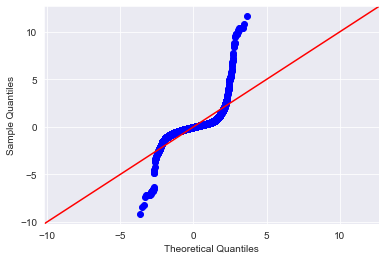

In [50]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

[&lt;matplotlib.lines.Line2D at 0x1fc295040c8&gt;]

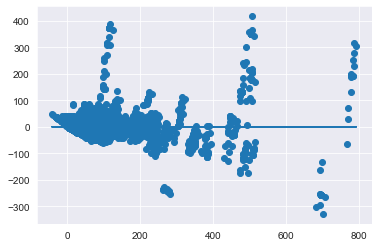

In [51]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1fc295a0888&gt;

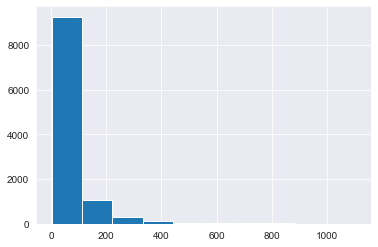

In [52]:
# Your code here - Check for outliers
df.list_price.hist()

In [53]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [54]:
# Your code here
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()
# Rerun the model

Percent removed: 0.010487580496780129


&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     406.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:13:29   Log-Likelihood:                -5054.4
No. Observations:                8067   AIC:                         1.023e+04
Df Residuals:                    8007   BIC:                         1.065e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3864      0.015    221.496      0.000       3.356       3.416
piece_count                                          0.6298      0.010     62.874      0.000       0.610       0.649
num_reviews                                         -0.0288      0.008     -3.758      0.000      -0.044      -0.014
play_star_rating                                     0.1224      0.007     17.630      0.000       0.109       0.136
star_rating                                         -0.0603      0.009     -6.894      0.000      -0.078      -0.043
val_star_rating                                     -0.1273      0.008    -16.457      0.000      -0.142      -0.112
ages_10_14                                           0.2000      0.125      1.598      0.110      -0.045       0.445
ages_10_16                                           0.5294      0.044     12.053      0.000       0.443       0.615
ages_10_21                                           0.6858      0.041     16.723      0.000       0.605       0.766
ages_11_16                                           0.1721      0.068      2.514      0.012       0.038       0.306
ages_12_16                                          -0.0828      0.086     -0.968      0.333      -0.250       0.085
ages_14plus                                          0.4196      0.048      8.679      0.000       0.325       0.514
ages_2_5                                             0.4839      0.023     21.375      0.000       0.440       0.528
ages_5_12                                           -0.7346      0.033    -22.382      0.000      -0.799      -0.670
ages_6plus                                          -0.8965      0.069    -12.997      0.000      -1.032      -0.761
ages_6_12                                           -0.1871      0.019     -9.611      0.000      -0.225      -0.149
ages_7_12                                            0.0606      0.025      2.437      0.015       0.012       0.109
ages_7_14                                           -0.0091      0.021     -0.440      0.660      -0.050       0.031
ages_8plus                                           0.5427      0.056      9.708      0.000       0.433       0.652
ages_8_12                                            0.2090      0.032      6.567      0.000       0.147       0.271
ages_8_14                                            0.2599      0.021     12.482      0.000       0.219       0.301
ages_9plus                                           0.1250      0.139      0.900      0.368      -0.147       0.397
ages_9_12                                            0.3662      0.075      4.869      0.000       0.219       0.514
theme_nam

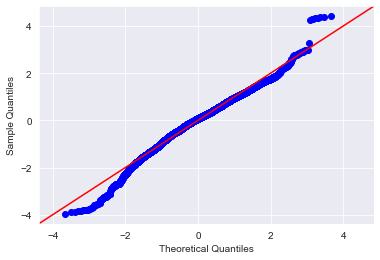

In [55]:
# Your code here - Check normality assumption
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

[&lt;matplotlib.lines.Line2D at 0x1fc2881d688&gt;]

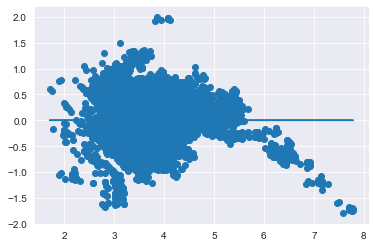

In [56]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


&lt;matplotlib.axes._subplots.AxesSubplot at 0x1fc287f3848&gt;

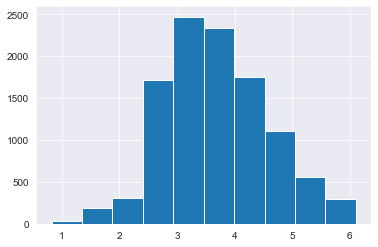

In [57]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [58]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     410.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:15:05   Log-Likelihood:                -4810.9
No. Observations:                8027   AIC:                             9742.
Df Residuals:                    7967   BIC:                         1.016e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4112      0.015    225.653      0.000       3.382       3.441
piece_count                                          0.6964      0.011     63.079      0.000       0.675       0.718
num_reviews                                         -0.0222      0.008     -2.906      0.004      -0.037      -0.007
play_star_rating                                     0.1178      0.007     17.456      0.000       0.105       0.131
star_rating                                         -0.0546      0.008     -6.435      0.000      -0.071      -0.038
val_star_rating                                     -0.1226      0.007    -16.425      0.000      -0.137      -0.108
ages_10_14                                           0.2400      0.111      2.156      0.031       0.022       0.458
ages_10_16                                           0.4849      0.046     10.532      0.000       0.395       0.575
ages_10_21                                           0.7030      0.040     17.361      0.000       0.624       0.782
ages_11_16                                           0.1092      0.067      1.619      0.105      -0.023       0.241
ages_12_16                                          -0.2996      0.093     -3.225      0.001      -0.482      -0.118
ages_14plus                                          0.2957      0.048      6.128      0.000       0.201       0.390
ages_2_5                                             0.5106      0.022     23.312      0.000       0.468       0.554
ages_5_12                                           -0.7285      0.032    -23.018      0.000      -0.791      -0.666
ages_6plus                                          -0.9409      0.069    -13.577      0.000      -1.077      -0.805
ages_6_12                                           -0.1813      0.019     -9.431      0.000      -0.219      -0.144
ages_7_12                                            0.0525      0.024      2.145      0.032       0.005       0.100
ages_7_14                                            0.0006      0.020      0.028      0.978      -0.039       0.040
ages_8plus                                           0.5558      0.053     10.532      0.000       0.452       0.659
ages_8_12                                            0.1829      0.031      5.878      0.000       0.122       0.244
ages_8_14                                            0.2608      0.020     12.834      0.000       0.221       0.301
ages_9plus                                           0.1540      0.121      1.272      0.203      -0.083       0.391
ages_9_12                                            0.3185      0.078      4.066      0.000       0.165       0.472
theme_nam

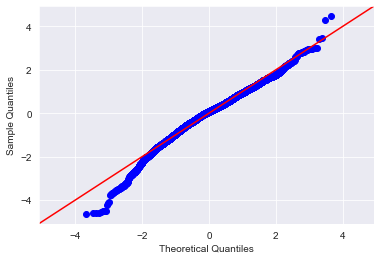

In [59]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

[&lt;matplotlib.lines.Line2D at 0x1fc28685f08&gt;]

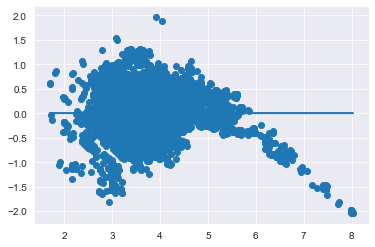

In [60]:
# Comment: No improvement observed
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 